In [21]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time
import pickle
from sklearn.decomposition import PCA
from PCHA import PCHA
from scipy.spatial import procrustes
import spams as sp
import NMF as nmf
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load mnist
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/mnist', one_hot=False)
data = mnist.train.images
data = (data * 2) - 1 # norm for tanh

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# pick single digit
digit = 4
idx_digit = mnist.train.labels == digit
data = data[idx_digit,]

In [57]:
# AAnet params
num_at = 3
noise_z_std = 0.08
z_dim = [256,64]
#z_dim = [] # linear AA
act_out = tf.nn.tanh
#act_out = None # linear last layer
input_dim = data.shape[1]

In [58]:
# network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [ ]:
# train
model.train(data, batch_size=128, num_batches=5000)

In [ ]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

In [ ]:
ats_x = model.get_ats_x()

In [ ]:
pca = PCA(n_components=2)
Z_at = np.eye(num_at)
samples_Z = model.data2at(data)
Y_pca_z = pca.fit_transform(samples_Z)
Y_pca = pca.transform(Z_at)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca_z[:,0], Y_pca_z[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=200, c='r')
for i in range(Y_pca.shape[0]):
    plt.text(Y_pca[i,0], Y_pca[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [ ]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(ats_x)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [ ]:
pca = PCA(n_components=2)
Y_pca_at = pca.fit_transform(ats_x)
Y_pca = pca.transform(data)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [ ]:
pca = PCA(n_components=2)
Y_pca_at = pca.fit_transform(ats_x)
Y_pca = pca.transform(data)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=100, c='r')
plt.show()

In [ ]:
ats_x = model.get_ats_x()
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(ats_x)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=100, c='r')
plt.show()

In [ ]:
# plot ATs
ats_x = model.get_ats_x()
AAtools.plot_mnist(ats_x)

In [ ]:
# PCHA
XC, S, C, _, _ = PCHA(data.T, noc=3)

In [ ]:
pca = PCA(n_components=2)
Y_pca_at = pca.fit_transform(XC.T)
Y_pca = pca.transform(data)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=100, c='r')
plt.show()

In [ ]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(XC.T)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=100, c='r')
plt.show()

In [ ]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(XC.T)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [ ]:
pca = PCA(n_components=2)
Y_pca_at = pca.fit_transform(XC.T)
Y_pca = pca.transform(data)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [ ]:
# plot ATs
AAtools.plot_mnist(XC.T)

In [ ]:
np.sum(C)

In [ ]:
np.sum(S)

In [ ]:
# PCA for NMF
k = 100
X = data
X = X - np.mean(X, keepdims=True, axis=0)
[U,_,_] = np.linalg.svd(X.T)
data_pca = X @ U[:,:k];
data_pca.shape
# NMF
W, H, L, Err = nmf.acc_palm_nmf(data_pca, r=3)

In [ ]:
# project back
H_orig = H @ U[:,:k].T + np.mean(data[:100,:], keepdims=True, axis=0);

In [ ]:
data_pca = PCA(n_components=10).fit_transform(data)
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(H_orig)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [ ]:
# plot ATs
AAtools.plot_mnist(H_orig)

In [27]:
# SPAMS
k = 100
X = data
X_mu = np.mean(X, keepdims=True, axis=0)
X = X - X_mu
[U,S,_] = np.linalg.svd(X.T)
data_pca = X @ U[:,:k];
data_pca.shape
X = data_pca.T
X = np.asfortranarray(X)
start = time.time()
[Z, A, B] = sp.archetypalAnalysis(X, p=3, returnAB= True, numThreads=-1)
end = time.time()
print(end - start)

741.9764966964722


In [31]:
# project back
Z_orig = Z.T @ U[:,:k].T + X_mu

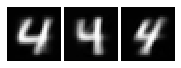

In [42]:
# plot ATs
AAtools.plot_mnist(Z_orig)

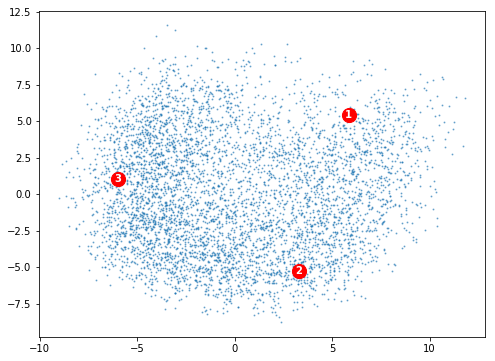

In [33]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(Z_orig)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [40]:
def sample_at_uniform(num_at, n):
    u = np.random.uniform(0,1,[n,num_at])
    e = -np.log(u)
    x = e / np.sum(e, axis=1, keepdims=True)
    return x

In [41]:
# sample uniform from simplex
at_sample_uniform = sample_at_uniform(3, 5000)
data_sample_uniform = at_sample_uniform @ Z_orig

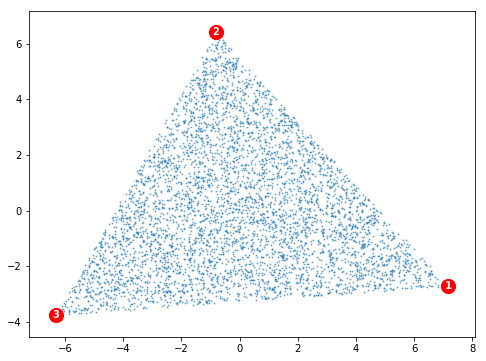

In [50]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data_sample_uniform)
Y_pca_at = pca.transform(Z_orig)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

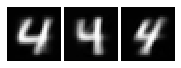

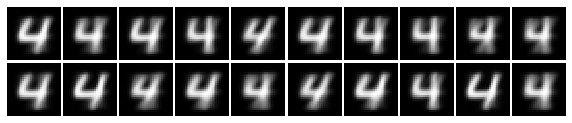

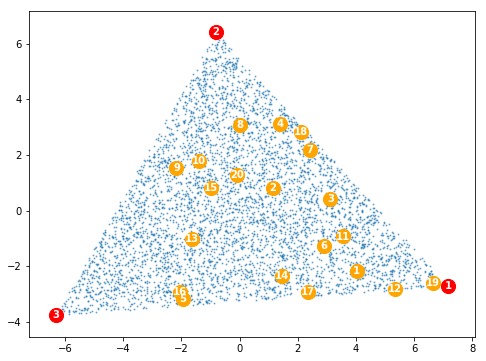

In [54]:
# plot ATs
AAtools.plot_mnist(Z_orig)
# samples
at_sample_uniform = sample_at_uniform(3, 20)
data_sample_uniform2 = at_sample_uniform @ Z_orig
AAtools.plot_mnist(data_sample_uniform2, nc=10)
# plot
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data_sample_uniform)
Y_pca_at = pca.transform(Z_orig)
Y_pca_2 = pca.transform(data_sample_uniform2)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})
plt.scatter(Y_pca_2[:,0], Y_pca_2[:,1], s=200, c='orange')
for i in range(Y_pca_2.shape[0]):
    plt.text(Y_pca_2[i,0], Y_pca_2[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [96]:
# AT scan
AT_scan = model.at_scan(10)
AT_scan.shape
idx = np.hstack([np.arange(1,9),np.arange(11,19),np.arange(21, 29)])
AT_scan = AT_scan[idx,:]

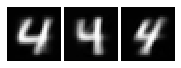

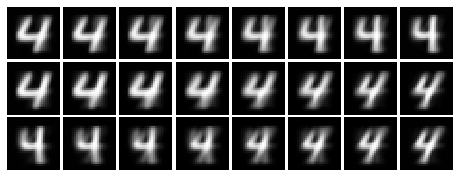

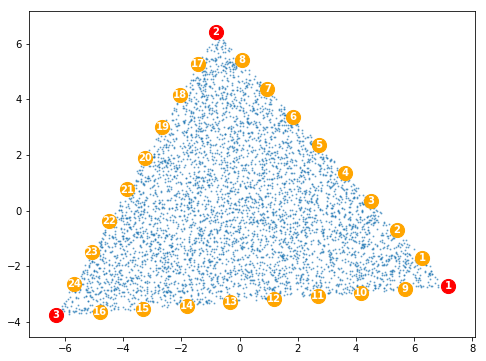

In [98]:
# plot ATs
AAtools.plot_mnist(Z_orig)

# samples
data_sample_uniform2 = AT_scan @ Z_orig
AAtools.plot_mnist(data_sample_uniform2, nc=8)

# plot
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data_sample_uniform)
Y_pca_at = pca.transform(Z_orig)
Y_pca_2 = pca.transform(data_sample_uniform2)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})
plt.scatter(Y_pca_2[:,0], Y_pca_2[:,1], s=200, c='orange')
for i in range(Y_pca_2.shape[0]):
    plt.text(Y_pca_2[i,0], Y_pca_2[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})